In [ ]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7690"
username = "neo4j"
password = ""
driver = GraphDatabase.driver(uri, auth=(username, password))

In [3]:
try:
    with driver.session() as session:
        result = session.run("RETURN 1 AS test")
    print("Connection successful")
except Exception as e:
    print(f"Connection failed: {e}")

Connection successful


In [8]:
import os
with open('./path.txt','r') as f:
    path = f.read()
os.path.exists(path)

False

In [4]:
business_path = "yelp_academic_dataset_business.json"
checkin_path = "yelp_academic_dataset_checkin.json"
review_path = "yelp_academic_dataset_review.json"
tip_path = "yelp_academic_dataset_tip.json"
user_path = "yelp_academic_dataset_user.json"

business_path, checkin_path, review_path, tip_path, user_path = list(map(lambda y: path + '/' + y,[business_path, checkin_path, review_path, tip_path, user_path]))

# User filtering

In [4]:
import pandas as pd
import json

df_user = pd.concat(pd.read_json(user_path, lines=True, chunksize=1000), ignore_index=True)
df_user = df_user[df_user['useful'] > 40]
print(df_user.shape[0])
# df_checkin = pd.concat(pd.read_json(checkin_path, lines=True, chunksize=1000), ignore_index=True)
# df_tip = pd.concat(pd.read_json(tip_path, lines=True, chunksize=1000), ignore_index=True)

221708


In [5]:
df1 = df_user[df_user['fans'] > 10]
print(df1.shape[0])
df2 = df1[df1['review_count'] > 100]
print(df2.shape[0])
df3 = df2[df2['friends'].str.split(',').map(len) > 1]
print(df3.shape[0])

46770
41443
41371


In [6]:
df3.to_csv('users.csv', index=False)

In [15]:
df3 = pd.read_csv('users.csv')
df3.shape[0]

50241

In [16]:
df3.iloc[0]['friends']

'NSCy54eWehBJyZdG2iE84w,1aU0r7X2luo9P8hfSpq6ng,8hqS8Wul46dt370JVRA83Q,TMLVzNYs-zwwREudyvI08A,36LgEtwt6ROhrCtuPjfRmQ,-f6amuvfIVS7VX65BqZ6pQ,dbrGVOcscXUQjQGi_0bnaQ,3gE3_MDUsCg-Tay4t1R5nA,zlqbbhAujrMla0eDiK7mIw,OLOCVi0PqJUdpUuIj4i70g,HpgDCyQGSR0TzYi00-wLew,0zqXX2SG7UiInTtU3JhWlg,kaKEer3UR5utYZsgp2tgPw,fcaikKJAYxlwO_RAiZm5Qg,sFd40YBmYCnOyHqoGlktzw,Dd3EKYgkkNnd5hV9hBMkYQ,x7rtl5JXTQ8Z-Ds7EWZXAQ,Lc2evNOlw-eUHBwI-HYklg,eCcjxh8zjAqn-kZVWZ_HJQ,ptLIFLUPwg3MYt-J62s3iA,V8OsxfIHpYWeMMeEsowHRw,dkkMQorZE0EF-F5wOiqA7w,wmdG2zC7SuIyy8tZ0nfLqg,W1gO_eI8Jh_FDvnCvJDRYg,K_yjrrDZBSic30Gr-dopqA,Y92t-YwfQzr948YZnN4rmg,0-n89YwF9LExnPIwgIVhoA,hiebCHxmMxdD1vAVtI2RVQ,tb_qrOfNR7POIz5nZLh3Vg,Nc4uWHBuFF407t3MzX0tOg,XGaMoQ6sg0B5hSzC5aRmdw,nT3tLANzGy0a7DuB_GIQjA,2nKm_urHROBCbWvbYrZqEQ,Ud6j2HN40qEhycq2PuwcBA,dR_r5k2quiaXvZ4BlTqhsg,6p08rh_BYAodK5PpplbtHw,_xzu_cuxhcbbfx6ASYev_g,02YdTEWFTFr6p71AZJVQ0Q,JOr0dVjhNINbpiks6YZE_A,WBmqTb2IrJu9_nIWgZu21g,-_dGQOHpKRFgDy5yTjjlUQ,hVPyu7QWaSQgOlz0rppmkg,24pirQC_JSQ-UunYOV5-6Q,yyI3fTGSRg

In [37]:
from tqdm import tqdm
df3 = pd.read_csv('users.csv')
tqdm.pandas(desc="Filtering friends")
user_fans_map = df3.set_index('user_id')['fans'].to_dict()
df3['friends'] = df3['friends'].fillna('').astype(str).progress_apply(
    lambda x: ','.join([friend for friend in x.split(',') if user_fans_map.get(friend, 0) > 60])
)

Filtering friends: 100%|██████████| 50241/50241 [00:00<00:00, 54254.94it/s]


In [38]:
df3['friends'].str.split(',').map(len).describe()

count    50241.000000
mean        43.145558
std         98.878806
min          1.000000
25%          7.000000
50%         16.000000
75%         38.000000
max       2352.000000
Name: friends, dtype: float64

In [40]:
df3.to_csv('users.csv', index=False)

In [39]:
df3.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000
mean,336.750204,1118.035230,528.153440,773.293505,39.784479,3.911032,65.619016,8.322187,6.252881,4.742481,2.381740,44.917836,104.281921,100.129914,100.129914,35.290221,44.998229
std,361.629025,3876.241141,2507.646066,3471.809547,106.150895,0.349463,457.813711,80.163044,95.112126,71.248062,63.126706,375.393697,743.527174,599.222380,599.222380,199.265635,596.685204
min,101.000000,41.000000,0.000000,7.000000,6.000000,1.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,157.000000,236.000000,60.000000,99.000000,11.000000,3.690000,2.000000,1.000000,0.000000,0.000000,0.000000,5.000000,7.000000,6.000000,6.000000,3.000000,1.000000
50%,235.000000,419.000000,129.000000,199.000000,19.000000,3.910000,8.000000,2.000000,1.000000,0.000000,0.000000,11.000000,14.000000,16.000000,16.000000,9.000000,4.000000
75%,386.000000,862.000000,323.000000,472.000000,37.000000,4.140000,24.000000,6.000000,2.000000,2.000000,1.000000,25.000000,38.000000,45.000000,45.000000,23.000000,11.000000
max,17473.000000,206296.000000,185823.000000,199878.000000,12497.000000,5.000000,25784.000000,13501.000000,14180.000000,13654.000000,12669.000000,59031.000000,101097.000000,49967.000000,49967.000000,15934.000000,82630.000000


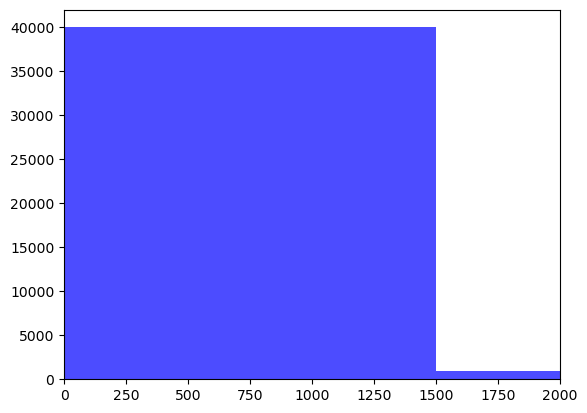

In [8]:
import matplotlib.pyplot as plt

plt.hist(df3['friends'].str.split(',').map(len), color='blue', alpha=0.7)
plt.xlim(0,2000)
plt.show()


# Business Filtering

In [9]:
df_business = pd.concat(pd.read_json(business_path, lines=True, chunksize=1000), ignore_index=True)

In [10]:
print(df_business.shape[0])
df_business1 = df_business[df_business['review_count'] > 44]
print(df_business1.shape[0])

150346
32115


In [11]:
df_business1.describe()

,latitude,longitude,stars,review_count,is_open
count,32115.000000,32115.000000,32115.000000,32115.000000,32115.000000
mean,36.169592,-89.537079,3.711038,156.390160,0.798350
std,5.322853,14.995062,0.743344,229.128127,0.401239
min,27.564457,-120.083745,1.000000,45.000000,0.000000
25%,30.011992,-90.324650,3.500000,61.000000,1.000000
50%,38.635129,-86.146391,4.000000,91.000000,1.000000
75%,39.947478,-75.405666,4.000000,165.000000,1.000000
max,53.649743,-74.682591,5.000000,7568.000000,1.000000


(array([3.1612e+04, 3.6800e+02, 8.2000e+01, 2.7000e+01, 9.0000e+00,
        9.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  45. ,  797.3, 1549.6, 2301.9, 3054.2, 3806.5, 4558.8, 5311.1,
        6063.4, 6815.7, 7568. ]),
 <BarContainer object of 10 artists>)

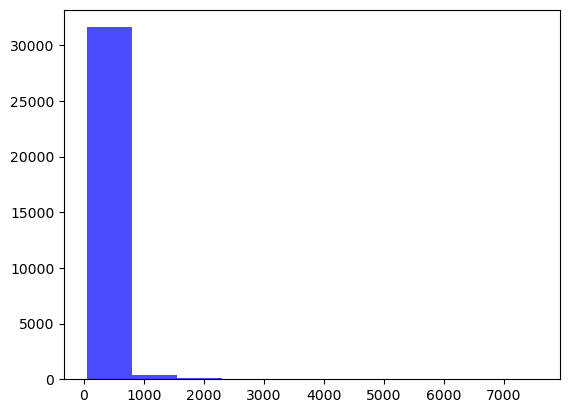

In [12]:
import matplotlib.pyplot as plt

plt.hist(df_business1['review_count'], color='blue', alpha=0.7)

In [13]:
df_business1.to_csv('business.csv', index=False)

# Review Filtering

In [ ]:
import pandas as pd

df_review = pd.concat(pd.read_json(review_path, lines=True, chunksize=1000), ignore_index=True)
print(df_review.shape[0])
df_review.describe()

In [5]:
df_review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [71]:
from tqdm import tqdm
from ast import literal_eval

df3 = pd.read_csv('users.csv')
df3['user_id'] = df3['user_id'].map(lambda x: x.strip())
user_set = set(df3['user_id'])

tqdm.pandas(desc="Splitting")
df3['friends'] = df3['friends'].fillna('').str.split(',').progress_map(lambda x: [i.strip() for i in x if i])
df3['friends'] = df3['friends'].progress_map(lambda x: [i for i in x if i in user_set] if isinstance(x, list) else [])
df3['friends'] = df3['friends'].progress_map(lambda x: ','.join(x) if isinstance(x, list) else '')

df3['friends'].map(len).describe()

Splitting: 100%|██████████| 41371/41371 [00:00<00:00, 562504.62it/s]


count     41371.000000
mean       2004.496024
std        4359.324620
min           0.000000
25%         390.000000
50%         804.000000
75%        1816.000000
max      123141.000000
Name: friends, dtype: float64

In [69]:
df3.iloc[0]['friends']

'NSCy54eWehBJyZdG2iE84w,1aU0r7X2luo9P8hfSpq6ng,TMLVzNYs-zwwREudyvI08A,36LgEtwt6ROhrCtuPjfRmQ,-f6amuvfIVS7VX65BqZ6pQ,dbrGVOcscXUQjQGi_0bnaQ,3gE3_MDUsCg-Tay4t1R5nA,zlqbbhAujrMla0eDiK7mIw,OLOCVi0PqJUdpUuIj4i70g,HpgDCyQGSR0TzYi00-wLew,0zqXX2SG7UiInTtU3JhWlg,B_RhT6CpAllq9NxtkpiDTA,kaKEer3UR5utYZsgp2tgPw,fcaikKJAYxlwO_RAiZm5Qg,sFd40YBmYCnOyHqoGlktzw,Dd3EKYgkkNnd5hV9hBMkYQ,eCcjxh8zjAqn-kZVWZ_HJQ,ptLIFLUPwg3MYt-J62s3iA,V8OsxfIHpYWeMMeEsowHRw,dkkMQorZE0EF-F5wOiqA7w,W1gO_eI8Jh_FDvnCvJDRYg,K_yjrrDZBSic30Gr-dopqA,Y92t-YwfQzr948YZnN4rmg,0-n89YwF9LExnPIwgIVhoA,hiebCHxmMxdD1vAVtI2RVQ,tb_qrOfNR7POIz5nZLh3Vg,Nc4uWHBuFF407t3MzX0tOg,XGaMoQ6sg0B5hSzC5aRmdw,nT3tLANzGy0a7DuB_GIQjA,2nKm_urHROBCbWvbYrZqEQ,Ud6j2HN40qEhycq2PuwcBA,dR_r5k2quiaXvZ4BlTqhsg,6p08rh_BYAodK5PpplbtHw,_xzu_cuxhcbbfx6ASYev_g,02YdTEWFTFr6p71AZJVQ0Q,WBmqTb2IrJu9_nIWgZu21g,-_dGQOHpKRFgDy5yTjjlUQ,hVPyu7QWaSQgOlz0rppmkg,24pirQC_JSQ-UunYOV5-6Q,9wLtMApHLswed6DbvXscwg,yyI3fTGSRgrNSaSVTqMV0A,GXn4ZsasLKh0qZ5g3nIqcQ,dKA5pV924YpE3zmAzShLcw,A4HNP067h3

In [70]:
df3.to_csv('users.csv', index=False)


In [64]:
from ast import literal_eval
df3 = pd.read_csv('users.csv')

df3['friends'] = df3['friends'].apply(literal_eval).apply(lambda x: ','.join(x))
df3.to_csv('users.csv', index=False)

In [33]:
df3.to_csv('users.csv', index=False)

In [6]:
df3 = pd.read_csv('users.csv')

In [41]:
df_business1 = pd.read_csv('business.csv')

In [ ]:
df_review1 = pd.read_csv('review.csv')
df3 = pd.read_csv('users.csv')
df_review1 = df_review1[df_review1['user_id'].isin(df3['user_id'])]
print(df_review1.shape[0])
df_review2 = df_review1[df_review1['business_id'].isin(df_business1['business_id'])]

55519


In [43]:
print(df_review2.shape[0])
df_review2.describe()

55519


,stars,useful,funny,cool
count,55519.000000,55519.000000,55519.000000,55519.000000
mean,4.007637,16.322592,6.971469,11.855779
std,1.148920,13.559924,9.157297,13.215911
min,1.000000,9.000000,0.000000,0.000000
25%,4.000000,10.000000,3.000000,6.000000
50%,4.000000,12.000000,5.000000,9.000000
75%,5.000000,17.000000,8.000000,14.000000
max,5.000000,392.000000,369.000000,360.000000


In [6]:
import pandas as pd

df_review2 = pd.read_csv('review.csv')

In [7]:
print(df_review2[df_review2['useful'] > 3].shape[0])
print(df_review2[df_review2['useful'] > 8].shape[0])
df_review2 = df_review2[df_review2['useful'] > 8]
print(df_review2.shape[0])

196374
54686
54686


In [8]:
df_review2.to_csv('review.csv', index=False)

(0.0, 80.0)

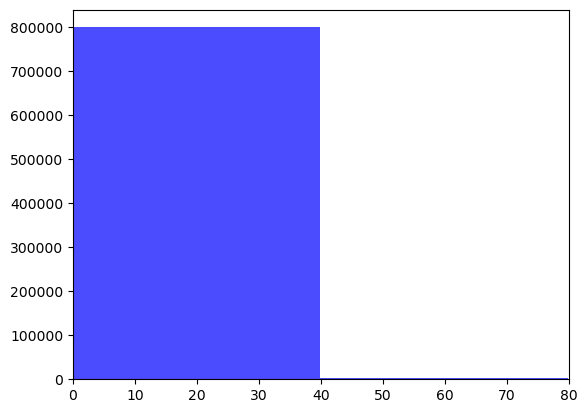

In [17]:
import matplotlib.pyplot as plt

plt.hist(df_review2['useful'],color='blue',alpha=0.7)
plt.xlim(0,80)

In [1]:
business_path = "business.csv"
review_path = "review.csv"
# tip_path = "yelp_academic_dataset_tip.json"
user_path = "users.csv"

# business_path, review_path, user_path = list(map(lambda y: path + '/' + y,[business_path, review_path, user_path]))
# business_path, review_path, user_path = list(map(lambda y:'"'+ path + '/' + y+'"',[business_path, review_path, user_path]))
print(business_path)

business.csv


In [ ]:
def import_csv(tx, csv_file_path, query):
    with open(csv_file_path, 'r') as file:
        tx.run(query, file=file)
    # with open(csv_file_path, 'r') as file:
    #     csv_data = file.read()
    # tx.run(query,file=file)
# csv_file_path = "path/to/your/data.csv"

import pandas as pd

users = pd.read_csv(business_path)
print(users.columns)
def create_graph(tx, df):
    for _, row in df.iterrows():
        query = """CREATE (n:Business  {business_id:$business_id})
                SET n.name=$name, 
                    n.address=$address,
                    n.city=$city,
                    n.state=$state,
                    n.latitude=$latitude,
                    n.longitude=$longitude,
                    n.stars=$stars,
                    n.review_count=$review_count,
                    n.hours=$hours,
                    n.attributes=$attributes
                    With n, split($categories,', ') as cats
                    unwind cats AS cat
                    merge (c:Category {name: cat})
                    Merge (n)-[:IN_CATEGORY]->(c)
                    """

        tx.run(query, business_id=row['business_id'],
                    address=['address'],
                    name=row['name'],
                    city=row['city'],
                    state=row['state'],
                    latitude=row['latitude'],
                    longitude=row['longitude'],
                    stars=row['stars'],
                    review_count=row['review_count'],
                    hours=row['hours'],
                    attributes=row['attributes'],
                    categories=row['categories'])

with driver.session() as session:
    session.execute_write(create_graph, users)

driver.close()

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


In [ ]:
def create_graph(tx, users_data):
    query = """UNWIND $users AS row
            CREATE (n:User {user_id: row.user_id})
                SET n.name = row.name,
                    n.review_count = row.review_count,
                    n.yelping_since = row.yelping_since,
                    n.useful = row.useful,
                    n.funny = row.funny,
                    n.cool = row.cool,
                    n.fans = row.fans,
                    n.average_stars = row.average_stars,
                    n.compliment_hot = row.compliment_hot,
                    n.compliment_more = row.compliment_more,
                    n.compliment_profile = row.compliment_profile,
                    n.compliment_cute = row.compliment_cute,
                    n.compliment_list = row.compliment_list,
                    n.compliment_note = row.compliment_note,
                    n.compliment_plain = row.compliment_plain,
                    n.compliment_cool = row.compliment_cool,
                    n.compliment_funny = row.compliment_funny,
                    n.compliment_writer = row.compliment_writer
                """
                # WITH n, split(row.friends, ',') AS frens
                # UNWIND frens AS friend_id
                # MERGE (f:User {user_id: rtrim(friend_id)})
                # MERGE (n)-[:HAS_FRIEND]->(f)
                # """ # eleite not used for now, was causing 
    tx.run(query,users=users_data)

chunk_size = 10000
i=1
for chunk in pd.read_csv(user_path, chunksize=chunk_size):
    print(f"chunk {i} being processed")
    users= chunk.to_dict('records')
    print("chunk converted to dicts")
    with driver.session() as session:
        session.execute_write(create_graph, users)
    print("chunk processed")
    i+=1

chunk 1 being processed
chunk converted to dicts
chunk processed
chunk 2 being processed
chunk converted to dicts
chunk processed
chunk 3 being processed
chunk converted to dicts
chunk processed
chunk 4 being processed
chunk converted to dicts
chunk processed
chunk 5 being processed
chunk converted to dicts
chunk processed
chunk 6 being processed
chunk converted to dicts
chunk processed


In [49]:
# Function to create nodes and relationships
def create_graph(tx, users_data):
    # for _, row in users.iterrows():
    # use create instead of merge for faster 
    query = """UNWIND $reviews AS row
            CREATE (n:Review {review_id: row.review_id})
                SET n.user_id = row.user_id,
                    n.business_id = row.business_id,
                    n.stars = row.stars,
                    n.useful = row.useful,
                    n.funny = row.funny,
                    n.cool = row.cool,
                    n.date = row.date,
                    n.text = row.text
                """
                # WITH n, split(row.friends, ',') AS frens
                # UNWIND frens AS friend_id
                # MERGE (f:User {user_id: rtrim(friend_id)})
                # MERGE (n)-[:HAS_FRIEND]->(f)
                # """ # eleite not used for now, was causing 
    tx.run(query,reviews=users_data)

# Execute the function within a transaction
chunk_size = 10000
i=1
for chunk in pd.read_csv(review_path, chunksize=chunk_size):
    print(f"chunk {i} being processed")
    reviews= chunk.to_dict('records')
    print("chunk converted to dicts")
    with driver.session() as session:
        session.execute_write(create_graph, reviews)
    print("chunk processed")
    i+=1

chunk 1 being processed
chunk converted to dicts
chunk processed
chunk 2 being processed
chunk converted to dicts
chunk processed
chunk 3 being processed
chunk converted to dicts
chunk processed
chunk 4 being processed
chunk converted to dicts
chunk processed
chunk 5 being processed
chunk converted to dicts
chunk processed
chunk 6 being processed
chunk converted to dicts
chunk processed


In [6]:
def import_csv(tx, csv_file_path, query):
    with open(csv_file_path, 'r') as file:
        tx.run(query, file=file)

import pandas as pd

# Function to create nodes and relationships
def create_graph(tx, users_data):
    # for _, row in users.iterrows():
    query = """UNWIND $reviews AS row
            MERGE (n:Review {review_id: row.review_id})
                WITH n, row
                Match (f:User {user_id: row.user_id})
                MERGE (f)-[rel:WRITES_REVIEW]->(n)
                """
    tx.run(query,reviews=users_data)

# Execute the function within a transaction
chunk_size = 10000
i=1
review_path = "review.csv"
for chunk in pd.read_csv(review_path, chunksize=chunk_size):
    print(f"chunk {i} being processed")
    reviews= chunk.to_dict('records')
    print("chunk converted to dicts")
    with driver.session() as session:
        session.execute_write(create_graph, reviews)
    print("chunk processed")
    i+=1

# Close the driver
driver.close()

chunk 1 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_25556/2682768723.py:26: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 2 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_25556/2682768723.py:26: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 3 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_25556/2682768723.py:26: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 4 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_25556/2682768723.py:26: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 5 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_25556/2682768723.py:26: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 6 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_25556/2682768723.py:26: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed


In [ ]:
def import_csv(tx, csv_file_path, query):
    with open(csv_file_path, 'r') as file:
        tx.run(query, file=file)

import pandas as pd

def create_graph(tx, users_data):
    # for _, row in users.iterrows():
    query = """UNWIND $reviews AS row
            MERGE (n:Review {review_id: row.review_id})
                WITH n, row
                Match (f:User {user_id: row.user_id})
                MERGE (f)-[rel:WRITES_REVIEW]->(n)
                """
    tx.run(query,reviews=users_data)

chunk_size = 10000
i=1
for chunk in pd.read_csv(review_path, chunksize=chunk_size):
    print(f"chunk {i} being processed")
    reviews= chunk.to_dict('records')
    print("chunk converted to dicts")
    with driver.session() as session:
        session.execute_write(create_graph, reviews)
    print("chunk processed")
    i+=1

# Close the driver
driver.close()

In [ ]:
import pandas as pd
import random

def create_graph(tx):
    # for _, row in users.iterrows():
    review_ids = [919958, 29809, 960556]
    # query = """
    #     MERGE (n1:Review_Type {review_id: $id1})
    #     MERGE (n2:Review_Type {review_id: $id2})
    #     MERGE (n3:Review_Type {review_id: $id3})
    # """
    query = """
        MATCH (n1:Review_Type {review_id: $id1})
        SET n1.name = 'Bad'
        WITH n1
        MATCH (n2:Review_Type {review_id: $id2})
        SET n2.name = 'Medium'
        WITH n1,n2
        MATCH (n3:Review_Type {review_id: $id3})
        SET n3.name = 'Good'
    """
    tx.run(query, id1=review_ids[0], id2=review_ids[1], id3=review_ids[2])

with driver.session() as session:
    session.execute_write(create_graph)
# Close the driver
driver.close()

/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_20247/59523222.py:25: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


In [ ]:
from concurrent.futures import ThreadPoolExecutor
import pandas as pd

def create_graph(tx, users_data):
    review_ids = [919958, 29809, 960556]
    review_dict = {'Bad': review_ids[0], 'Medium': review_ids[1], 'Good': review_ids[2]}
    # for _, row in users.iterrows():
    query = """UNWIND $reviews AS row
                MATCH (n:Review {review_id: row.review_id})
                WITH n, row
                MATCH (f1:Review_Type {review_id: $bad_id})
                WITH n, row, f1
                MATCH (f2:Review_Type {review_id: $medium_id})
                WITH n, row, f1, f2
                MATCH (f3:Review_Type {review_id: $good_id})
                WITH n, row, f1, f2, f3
                WITH n, row, f1, f2, f3,
                    CASE 
                        WHEN row.stars < 3 THEN f1
                        WHEN row.stars = 3 THEN f2
                        ELSE f3
                    END AS target
                MERGE (n)-[:OPINION]->(target)
                """
    tx.run(query,reviews=users_data,bad_id=review_dict['Bad'],medium_id=review_dict['Medium'],good_id=review_dict['Good'])

def process_chunk(chunk):
    reviews = chunk.to_dict('records')
    with driver.session() as session:
        session.execute_write(create_graph, reviews)
    print("Chunk processed")

chunk_size = 50000
chunks = pd.read_csv(review_path, chunksize=chunk_size)

with ThreadPoolExecutor(max_workers=4) as executor:  # Use 4 threads
    executor.map(process_chunk, chunks)

# chunk_size = 10000
# i=1
# for chunk in pd.read_csv(review_path, chunksize=chunk_size):
#     print(f"chunk {i} being processed")
#     reviews= chunk.to_dict('records')
#     print("chunk converted to dicts")
#     with driver.session() as session:
#         session.execute_write(create_graph, reviews)
#     print("chunk processed")
#     i+=1

# Close the driver
driver.close()

Chunk processed
Chunk processed


In [2]:
import pandas as pd
from tqdm import tqdm
from ast import literal_eval

df3 = pd.read_csv("users.csv")
user_set = set(df3['user_id'])
print(type(df3['friends'][0]))
# i = 0
def find_top10(frenlist):
    # global i
    # print(i)
    # i+=1
    if type(frenlist)==str:
        friends=set(frenlist.split(','))
    else:
        return []
    # df_temp=df3[]
    # df_temp=[row for row in df3 if row['user_id'] in friends]
    df_temp=df3[df3['user_id'].isin(friends)]
    # print(df_temp['fans'])
    df_temp=df_temp.sort_values(by='fans', ascending=False)
    # print(df_temp['fans'])
    L= df_temp['user_id'].head(5).tolist()
    # print(L)
    return L

L=find_top10(df3['friends'][0])
print(type(L),len(L))
tqdm.pandas(desc="Top10")
df3['friends'] = df3['friends'].progress_map(find_top10)
print(df3['friends'].head())
# df3['friends'].map(len).describe()

<class 'str'>
<class 'list'> 5


Top10: 100%|██████████| 50241/50241 [01:28<00:00, 567.60it/s]

0    [VHdY6oG2JPVNjihWhOooAQ, iLjMdZi0Tm7DQxX1C1_2d...
1    [37cpUoM8hlkSQfReIEBd-Q, Hi10sGSZNxQH3NLyWSZ1o...
2    [djxnI8Ux8ZYQJhiOQkrRhA, G9Vb6yQ047TC3O_-GG4WZ...
3    [To7EBxWC-Yz011V2-tdTvA, 1kpMAKRZuAz3OzxBav3XT...
4    [hizGc5W1tBHPghM5YKCAtg, VHdY6oG2JPVNjihWhOooA...
Name: friends, dtype: object


In [10]:
df3['friends'] = df3['friends'].apply(lambda x: ','.join(x))

In [5]:
df3 = pd.read_csv('users.csv')
df3.iloc[0]['friends']
print(df3.shape[0])

50241


In [6]:
df3.iloc[0]['user_id']

'qVc8ODYU5SZjKXVBgXdI7w'

In [6]:
import pandas as pd

def create_graph(tx, users_data):
    query = """
        UNWIND $users AS row
        MATCH (n:User {user_id: row.user_id})
        WITH n, row.friends AS frens
        WHERE frens = toString(frens)
        UNWIND split(frens, ",") AS friend_id
        MATCH (f:User {user_id: friend_id})
        MERGE (n)-[:HAS_FRIEND]->(f)
    """
    tx.run(query, users=users_data)

chunk_size = 10000
i=1
user_path = "users.csv"
for chunk in pd.read_csv(user_path, chunksize=chunk_size):
    print(f"chunk {i} being processed")
    users= chunk.to_dict('records')
    print("chunk converted to dicts")
    with driver.session() as session:
        session.execute_write(create_graph, users)
    print("chunk processed")
    i+=1

# Close the driver
# driver.close()

chunk 1 being processed
chunk converted to dicts


Transaction failed and will be retried in 1.1204836117175991s (ForsetiClient[transactionId=1955, clientId=6] can't acquire ExclusiveLock{owner=ForsetiClient[transactionId=1938, clientId=9]} on NODE_RELATIONSHIP_GROUP_DELETE(33218) because holders of that lock are waiting for ForsetiClient[transactionId=1955, clientId=6].
 Wait list:ExclusiveLock[
Client[1938] waits for [ForsetiClient[transactionId=1816, clientId=1],ForsetiClient[transactionId=1942, clientId=4],ForsetiClient[transactionId=1955, clientId=6]]])


TransientError: {code: Neo.TransientError.Transaction.DeadlockDetected} {message: ForsetiClient[transactionId=2089, clientId=6] can't acquire ExclusiveLock{owner=ForsetiClient[transactionId=2084, clientId=5]} on NODE_RELATIONSHIP_GROUP_DELETE(33218) because holders of that lock are waiting for ForsetiClient[transactionId=2089, clientId=6].
 Wait list:ExclusiveLock[
Client[2084] waits for [ForsetiClient[transactionId=2089, clientId=6]]]}

In [25]:
import pandas as pd

def create_graph(tx, users_data):
    query = """
        UNWIND $businesses AS row
        MERGE (n:Business {business_id: row.business_id})
        WITH n, row
        MERGE (f:City {city: row.city})
        MERGE (n)-[:IN_CITY]->(f)
    """
    tx.run(query, businesses=users_data)

business_path = "business.csv"
chunk_size = 5000
i=1
for chunk in pd.read_csv(business_path, chunksize=chunk_size):
    print(f"chunk {i} being processed")
    businesses= chunk.to_dict('records')
    print("chunk converted to dicts")
    with driver.session() as session:
        session.execute_write(create_graph, businesses)
    print("chunk processed")
    i+=1

# Close the driver
# driver.close()

chunk 1 being processed
chunk converted to dicts
chunk processed
chunk 2 being processed
chunk converted to dicts
chunk processed
chunk 3 being processed
chunk converted to dicts
chunk processed
chunk 4 being processed
chunk converted to dicts
chunk processed
chunk 5 being processed
chunk converted to dicts
chunk processed
chunk 6 being processed
chunk converted to dicts
chunk processed
chunk 7 being processed
chunk converted to dicts
chunk processed


In [18]:
df3 = pd.read_csv('business.csv')

df3.iloc[0]['city']

'Philadelphia'

In [ ]:
def import_csv(tx, csv_file_path, query):
    with open(csv_file_path, 'r') as file:
        tx.run(query, file=file)
    # with open(csv_file_path, 'r') as file:
    #     csv_data = file.read()
    # tx.run(query,file=file)
# csv_file_path = "path/to/your/data.csv"

import pandas as pd


def create_graph(tx, data):
    # for _, row in df.iterrows():
        # query = """CREATE (n:Businses  {name:$name,
        #change this to use SET so that ubusiness ID is only thing that is unique that is tehre
    query = """ UNWIND $business AS row
            Create (n:Business  {business_id:row.business_id})
            SET n.name=row.name, 
                n.address=row.address,
                n.city=row.city,
                n.state=row.state,
                n.latitude=row.latitude,
                n.longitude=row.longitude,
                n.stars=row.stars,
                n.review_count=row.review_count,
                n.hours=row.hours,
                n.attributes=row.attributes
            With n, row
            Merge (k:City {name: row.city})
            Merge (n)-[:IN_CITY]->(k)
            With n, row
            Merge (k:State {name: row.state})
            Merge (n)-[:IN_STATE]->(k)
            With n, split(row.categories,', ') as cats
            unwind cats AS cat
            merge (c:Category {name: cat})
            Merge (n)-[:IN_CATEGORY]->(c)
                """

    tx.run(query, business=data)

chunk_size = 10000
i=1
for chunk in pd.read_csv(business_path, chunksize=chunk_size):
    print(f"chunk {i} being processed")
    users= chunk.to_dict('records')
    print("chunk converted to dicts")
    with driver.session() as session:
        session.execute_write(create_graph, users)
    print("chunk processed")
    i+=1

# Close the driver
# driver.close()

chunk 1 being processed
chunk converted to dicts
chunk processed
chunk 2 being processed
chunk converted to dicts
chunk processed
chunk 3 being processed
chunk converted to dicts
chunk processed
chunk 4 being processed
chunk converted to dicts
chunk processed


In [ ]:
def import_csv(tx, csv_file_path, query):
    with open(csv_file_path, 'r') as file:
        tx.run(query, file=file)
    # with open(csv_file_path, 'r') as file:
    #     csv_data = file.read()
    # tx.run(query,file=file)
# csv_file_path = "path/to/your/data.csv"

import pandas as pd


def create_graph(tx, data):
    # for _, row in df.iterrows():
        # query = """CREATE (n:Businses  {name:$name,
        #change this to use SET so that ubusiness ID is only thing that is unique that is tehre
    query = """ UNWIND $reviews AS row
                MERGE (n:Review  {review_id:row.review_id})
                WITH n, row
                MERGE (f:Business {business_id: row.business_id})
                MERGE (n)-[:REVIEW_FOR]->(f)
            """

    tx.run(query, reviews=data)
review_path = "review.csv"
chunk_size = 10000
i=1
for chunk in pd.read_csv(review_path, chunksize=chunk_size):
    print(f"chunk {i} being processed")
    reviews= chunk.to_dict('records')
    print("chunk converted to dicts")
    with driver.session() as session:
        session.execute_write(create_graph, reviews)
    print("chunk processed")
    i+=1

# Close the driver
# driver.close()

chunk 1 being processed
chunk converted to dicts
chunk processed
chunk 2 being processed
chunk converted to dicts
chunk processed
chunk 3 being processed
chunk converted to dicts
chunk processed
chunk 4 being processed
chunk converted to dicts
chunk processed
chunk 5 being processed
chunk converted to dicts
chunk processed
chunk 6 being processed
chunk converted to dicts
chunk processed


## Restaurants Visited by Fox

In [4]:
import pandas as pd
import random

def create_graph(tx):
    query = """
        MATCH (fox:User {name: "Fox"})-[:WRITES_REVIEW]->(review)-[:REVIEW_FOR]->(business)
        MATCH (business)-[:IN_CATEGORY]->(category)
        RETURN category.name as category,business.name as business,review.stars as review_stars
        ORDER BY review.stars DESC
    """
    result = tx.run(query)
    return result.data()

with driver.session() as session:
    results = session.execute_write(create_graph)

fox_categories = set()
fox_businesses = set()
for record in results:
    fox_categories.add(record['category'])
    fox_businesses.add(record['business'])
    print(record)
print("Categories",fox_categories)
print("Businesses",fox_businesses)
# Close the driver
driver.close()

{'category': 'Restaurants', 'business': 'West Tampa Sandwich Shop', 'review_stars': 5}
{'category': 'Breakfast & Brunch', 'business': 'West Tampa Sandwich Shop', 'review_stars': 5}
{'category': 'Sandwiches', 'business': 'West Tampa Sandwich Shop', 'review_stars': 5}
{'category': 'Cuban', 'business': 'West Tampa Sandwich Shop', 'review_stars': 5}
{'category': 'Spanish', 'business': 'West Tampa Sandwich Shop', 'review_stars': 5}
{'category': 'Restaurants', 'business': "John's Roast Pork", 'review_stars': 5}
{'category': 'American (Traditional)', 'business': "John's Roast Pork", 'review_stars': 5}
{'category': 'Breakfast & Brunch', 'business': "John's Roast Pork", 'review_stars': 5}
{'category': 'American (New)', 'business': "John's Roast Pork", 'review_stars': 5}
{'category': 'Salad', 'business': "John's Roast Pork", 'review_stars': 5}
{'category': 'Sandwiches', 'business': "John's Roast Pork", 'review_stars': 5}
{'category': 'Active Life', 'business': "John's Roast Pork", 'review_stars'

In [5]:
import pandas as pd

df_friends = pd.read_csv('usersAllFriends.csv')

fox_friends = df_friends[df_friends['name'] == 'Fox']['friends'].values[0]
print(len(fox_friends),fox_friends)

49150 N52nbyDKZte4PUfJVNpkGQ,NfU0zDaTMEQ4-X9dbQWd9A,4wp4XI9AxKNqJima-xahlg,NnrCwpS1i5mZtkGGzmIk0g,Lfv4hefW1VbvaC2gatTFWA,BglOuciRdUozTEXxksGKUA,D4Eznn83MRWUK39n5WI0JA,a7dPjzrWpB-KZrFNZ5HWNg,MeDuKsZcnI3IU2g7OlV-hQ,uUnZ1AOoNN7Fs7doYooTnQ,VWJ8PSz6Sg5_AlBvQyGvpw,QwY_IrZ7Xs4N1ksO6GUBOA,NHVhLrdEP2COylG3O_7ZiQ,TB4vPIkaAK7RPb87RewQPw,4-Sx8oZ4hwXR5YNWJHnAMw,9GhiQOLaM6ZGrrFG-SppwQ,hZYaH19h9RKAaWF06aVwzg,Gg8l36zARvYVPJ32hA4tOA,bXGvh3OUHP-FmNFUWtlYDw,cXZOCUK1qo5e2_56Wmb9Aw,0dHBPR0U2pKU5r2DTCbPuQ,PPG_Tn1bFkygQhotxIHTIw,jqf3-kqRhRUqAyT7DXSVSg,kNnglP6DO_K7biuLThA_5g,-WYbVngIGDQ81MY12UtwnA,r_Q6zhem0pJhvLcvp3YTXw,9z87JubGpLEvl5nYRyXB2Q,C3qEstGibMzf_O8ghB4BpQ,5bgsQymr8HDT3tyC1N3Uhg,_V2BZA6ZKxSM6J9wTBszkw,fG7E6EO-Op2gKX5OsXrF0w,mNBajsDawDv22-E53frWPQ,jomfjMQzGUc3u2g2_T3vKg,qbbCqdPbdkL2d_E9QeA2fw,J1yNYAjojpD_KpocG-W3KQ,vNbr4JUZtIDB34xT-1n8ew,Oi1qbcz2m2SnwUeztGYcnQ,TvzNt0Mz7J31SJ87SnVO5Q,ZraFaoEWTJo97cv8911GQQ,nK58bW6Gmh2-J2IJEzr7uA,ax7SnXOTIpatbsmqHLqVow,e4R1AfbjgV5POjumgCtFzQ,4ABktWZ7hBX86f0hYh5_bA,0acki

In [6]:
import pandas as pd
import random

def create_graph(tx):
    query = """
        MATCH (fox:User {name: "Fox"})
        MATCH (fox)-[:HAS_FRIEND]->(friend:User)
        MATCH (friend)-[:WRITES_REVIEW]->(friendReview)-[:REVIEW_FOR]->(business:Business)
        MATCH (friendReview)-[:OPINION]->(opinion)
        WHERE opinion.name = "Good"

        WITH fox, friend, business, COUNT(DISTINCT friendReview) AS positiveReviews
        // WHERE NOT EXISTS {
        //   MATCH (fox)-[:WRITES_REVIEW]->()-[:REVIEW_FOR]->(business)
        // }

        WITH business, COUNT(DISTINCT friend) AS friendCount, SUM(positiveReviews) AS totalPositiveReviews
        WITH business, friendCount, totalPositiveReviews, 
            (friendCount * 0.3) + (totalPositiveReviews * 0.7) AS recommendationScore
        MATCH (business)-[:IN_CATEGORY]->(category)
        WITH business, friendCount, totalPositiveReviews, recommendationScore, COLLECT(category.name) AS categories
        RETURN business.name AS businessName, 
            friendCount AS numberOfFriendsWhoLiked,
            totalPositiveReviews AS totalPositiveReviews,
            categories,
            recommendationScore
        ORDER BY recommendationScore DESC
    """
    result = tx.run(query)
    return result.data()

with driver.session() as session:
    results = session.execute_write(create_graph)

friends_categories = set()
friends_businesses = set()
for record in results:
    friends_categories.update(record['categories'])
    friends_businesses.add(record['businessName'])
    print(record)
print(friends_categories)
print(friends_businesses)

# Close the driver
driver.close()

/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_9748/3839782435.py:32: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


{'businessName': 'Reading Terminal Market', 'numberOfFriendsWhoLiked': 4, 'totalPositiveReviews': 4, 'categories': ['Restaurants', 'Food', 'Coffee & Tea', 'Bakeries', 'Seafood', 'Arts & Entertainment', 'Specialty Food', 'Beer', 'Wine & Spirits', 'Ice Cream & Frozen Yogurt', 'Chinese', 'Fast Food', 'Bagels', 'Shopping', 'Ethnic Food', 'Juice Bars & Smoothies', 'Food Stands', 'Seafood Markets', 'Desserts', 'Fashion', 'Grocery', 'Local Flavor', 'Wineries', 'Sporting Goods', 'Department Stores', 'Farmers Market', 'Health Markets', 'Meat Shops', 'Fruits & Veggies', 'Candy Stores', 'Chocolatiers & Shops', 'Shopping Centers', 'Cheese Shops', 'Public Markets', 'Food Court', 'Dinner Theater'], 'recommendationScore': 4.0}
{'businessName': "Jacques-Imo's Cafe", 'numberOfFriendsWhoLiked': 3, 'totalPositiveReviews': 3, 'categories': ['Restaurants', 'Seafood', 'Cajun/Creole', 'Vegetarian'], 'recommendationScore': 2.9999999999999996}
{'businessName': 'Wat Mongkolratanaram of Florida', 'numberOfFriend

In [30]:
import pandas as pd

df_friends = pd.read_csv('usersAllFriends.csv')

fox_friends = df_friends[df_friends['name'] == 'Fox']['friends'].values[0]
fox_friends_list = fox_friends.split(',')
print(f"Number of friends: {len(fox_friends_list)}")

def get_recommendations(tx, friend_ids):
    query = """
        UNWIND $friend_ids AS friend_id
        MATCH (friend:User {user_id: friend_id})
        MATCH (friend)-[:WRITES_REVIEW]->(friendReview)-[:REVIEW_FOR]->(business:Business)
        MATCH (friendReview)-[:OPINION]->(opinion)
        WHERE opinion.name = "Good"

        WITH business, COUNT(DISTINCT friend) AS friendCount, COUNT(DISTINCT friendReview) AS positiveReviews
        WITH business, friendCount, positiveReviews, 
             (friendCount * 0.4) + (positiveReviews * 0.6) AS recommendationScore
        MATCH (business)-[:IN_CATEGORY]->(category)
        WITH business, friendCount, positiveReviews, recommendationScore, COLLECT(category.name) AS categories
        RETURN business.name AS businessName, 
               friendCount AS numberOfFriendsWhoLiked,
               positiveReviews AS totalPositiveReviews,
               categories,
               recommendationScore
        ORDER BY recommendationScore DESC
    """
    result = tx.run(query, friend_ids=friend_ids)
    return result.data()

with driver.session() as session:
    recommendations = session.execute_write(get_recommendations, fox_friends_list)

all_friends_categories = set()
all_friends_businesses = set()
business_recommendation_score = {}
for record in recommendations:
    all_friends_categories.update(record['categories'])
    all_friends_businesses.add(record['businessName'])
    business_recommendation_score[record['businessName']] = {
        'recommendationScore': record['recommendationScore']
    }
    print(record)
print("Categories:",all_friends_categories)
print("Businesses",all_friends_businesses)

driver.close()

Number of friends: 2137


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_9748/1082124656.py:32: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



{'businessName': 'Reading Terminal Market', 'numberOfFriendsWhoLiked': 32, 'totalPositiveReviews': 33, 'categories': ['Restaurants', 'Food', 'Coffee & Tea', 'Bakeries', 'Seafood', 'Arts & Entertainment', 'Specialty Food', 'Beer', 'Wine & Spirits', 'Ice Cream & Frozen Yogurt', 'Chinese', 'Fast Food', 'Bagels', 'Shopping', 'Ethnic Food', 'Juice Bars & Smoothies', 'Food Stands', 'Seafood Markets', 'Desserts', 'Fashion', 'Grocery', 'Local Flavor', 'Wineries', 'Sporting Goods', 'Department Stores', 'Farmers Market', 'Health Markets', 'Meat Shops', 'Fruits & Veggies', 'Candy Stores', 'Chocolatiers & Shops', 'Shopping Centers', 'Cheese Shops', 'Public Markets', 'Food Court', 'Dinner Theater'], 'recommendationScore': 32.6}
{'businessName': "Commander's Palace", 'numberOfFriendsWhoLiked': 25, 'totalPositiveReviews': 26, 'categories': ['Restaurants', 'Cocktail Bars', 'Bars', 'Nightlife', 'American (Traditional)', 'Breakfast & Brunch', 'American (New)', 'Cajun/Creole', 'French'], 'recommendationS

In [31]:
recall_all_businesses = len(all_friends_businesses.intersection(fox_businesses))/len(fox_businesses)
print("Recall businesses (all friends):",recall_all_businesses)
recall_all_categories = len(all_friends_categories.intersection(fox_categories))/len(fox_categories)
print("Recall categories (all friends):",recall_all_categories)
recall_businesses = len(friends_businesses.intersection(fox_businesses))/len(fox_businesses)
print("Recall businesses (5 most popular friends):",recall_businesses)
recall_categories = len(friends_categories.intersection(fox_categories))/len(fox_categories)
print("Recall categories (5 most popular friends):",recall_categories)

Recall businesses (all friends): 0.75
Recall categories (all friends): 1.0
Recall businesses (5 most popular friends): 0.17647058823529413
Recall categories (5 most popular friends): 0.935064935064935


In [32]:
import pandas as pd
import plotly.graph_objects as go

intersection_businesses = all_friends_businesses.intersection(fox_businesses)

business_scores_df = pd.DataFrame.from_dict(business_recommendation_score, orient='index').reset_index()
business_scores_df.columns = ['businessName', 'recommendationScore']
business_scores_df = business_scores_df[business_scores_df['businessName'].isin(intersection_businesses)]

business_scores_df = business_scores_df.sort_values(by='recommendationScore', ascending=False)

fig = go.Figure(go.Bar(
    x=business_scores_df['recommendationScore'],
    y=business_scores_df['businessName'],
    orientation='h',
    marker=dict(color='blue')
))

fig.update_layout(
    title='Businesses and Their Recommendation Scores (Intersection)',
    xaxis_title="Recommendation Score",
    yaxis_title="Business Name",
    yaxis=dict(autorange="reversed"),
    height=800,
    width=1000
)

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

non_intersection_businesses = set(business_recommendation_score.keys()) - all_friends_businesses.intersection(fox_businesses)

business_scores_df = pd.DataFrame.from_dict(business_recommendation_score, orient='index').reset_index()
business_scores_df.columns = ['businessName', 'recommendationScore']
business_scores_df = business_scores_df[business_scores_df['businessName'].isin(non_intersection_businesses)]

business_scores_df = business_scores_df.sort_values(by='recommendationScore', ascending=False)

fig = go.Figure(go.Bar(
    x=business_scores_df['recommendationScore'],
    y=business_scores_df['businessName'],
    orientation='h',
    marker=dict(color='orange')
))

fig.update_layout(
    title='Businesses and Their Recommendation Scores (Not in Intersection)',
    xaxis_title="Recommendation Score",
    yaxis_title="Business Name",
    yaxis=dict(autorange="reversed"),
    height=800,
    width=1000,
    plot_bgcolor='lightgrey',
    paper_bgcolor='lightgrey',
    font=dict(color='black')
)

fig.show()